<a href="https://colab.research.google.com/github/anerocha/an-lise-de-dados-sql/blob/main/Explora%C3%A7%C3%A3o_e_An%C3%A1lise_de_Dados_com_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Exploração e Análise de Dados de Crédito com SQL**

---

Esse notebook faz parte do curso SQL para análise de dados da EBAC. O objetivo aqui é entender como explorar e analisar dados de crédito de clientes de um banco utilizando SQL, especificamente no AWS Athena.

# **Dados Disponíveis**

O conjunto de dados utilizado contém informações sobre os clientes de um banco e suas transações de crédito. As colunas presentes no dataset são:


*  idade: Idade do cliente.
* sexo: Sexo do cliente (F ou M).
* dependentes: Número de dependentes do cliente.
* escolaridade: Nível de escolaridade do cliente.
* : Faixa salarial do cliente.
* tipo_cartao: Tipo de cartão de crédito (ex: Gold, Platinum, etc).
* qtd_produtos: Quantidade de produtos adquiridos nos últimos 12 meses.
* iteracoes_12m: Quantidade de transações nos últimos 12 meses.
* meses_inativo_12m: Quantidade de meses em que o cliente esteve inativo.
* limite_credito: Limite de crédito concedido ao cliente.
* valor_transacoes_12m: Valor total das transações realizadas nos últimos 12 meses.
* qtd_transacoes_12m: Quantidade de transações realizadas nos últimos 12 meses.



## 1\. Exploração de Dados

A primeira fase de qualquer análise de dados é entender a estrutura e a natureza dos dados. Vamos executar algumas consultas SQL para explorar o conjunto de dados.

### **1.1. Quantidade de Registros na Base de Dados**

Queremos saber quantos registros existem na nossa base de dados.

*SELECT count(*) FROM credito;


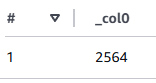

**Resposta:** A base de dados contém 2564 linhas.



### **1.2. Primeiras Linhas do Conjunto de Dados**

Vamos exibir as primeiras 10 linhas do conjunto de dados para ter uma noção dos dados que estamos lidando.

*SELECT * FROM credito LIMIT 10;*


Através dessa consulta, podemos ver que existem algumas informações nulas em colunas como escolaridade e salario_anual.



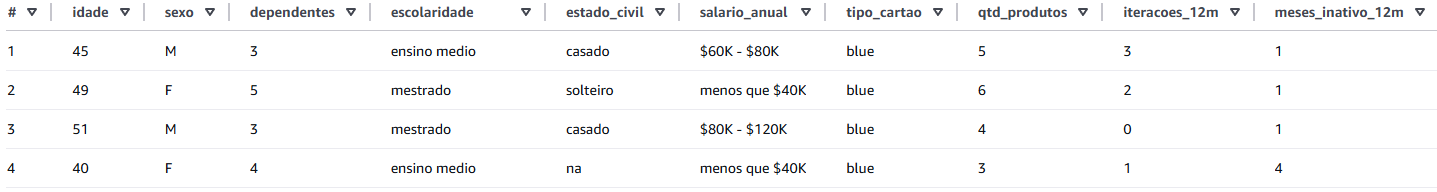

### **1.3. Descrição dos Tipos de Dados**

Agora, vamos verificar os tipos de dados em cada coluna da nossa tabela.

*DESCRIBE credito;*


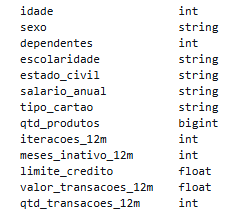

Essa consulta nos fornece os tipos de dados para cada coluna, o que nos ajudará a entender melhor como as informações estão estruturadas.

### **1.4. Quais São os Tipos de Escolaridade no Dataset?**

Queremos saber quais são os níveis de escolaridade presentes no dataset. Isso pode nos ajudar a entender melhor a composição dos clientes.

*SELECT DISTINCT escolaridade FROM credito;*


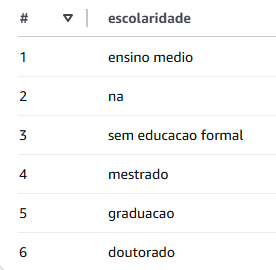

**Resposta:** Existem vários níveis de escolaridade, e também podemos observar que há valores nulos.



### **1.5. Tipos de Estado Civil**

Vamos investigar os tipos de estado civil presentes.

*SELECT DISTINCT estado_civil FROM credito;*


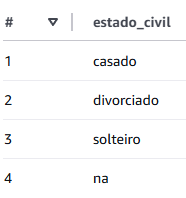

Assim como no caso da escolaridade, podemos perceber que há valores nulos.



### **1.6. Tipos de Faixa Salarial**

Queremos saber as faixas salariais dos clientes.

*SELECT DISTINCT salario_anual FROM credito;*


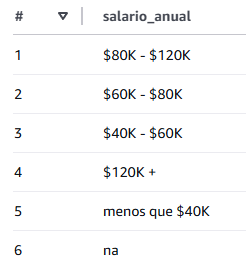

**Resposta:** As faixas salariais não mostram o valor exato do salário, mas sim categorias, como "menos de 20K", "20K-40K", etc. Também há dados nulos.

### **1.7. Tipos de Cartão de Crédito**

Agora vamos verificar quais tipos de cartão de crédito os clientes possuem.

*SELECT DISTINCT tipo_cartao FROM credito;*


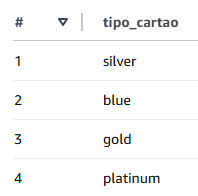

Aqui, vemos que não há valores nulos, e os tipos de cartão variam entre Gold, Platinum, Blue, entre outros.



## 2\. Análise de Dados


Agora que já exploramos os dados, vamos realizar algumas análises mais detalhadas para entender os padrões e características dos clientes.

### **2.1. Quantidade de Clientes por Faixa Salarial**

Queremos saber quantos clientes pertencem a cada faixa salarial.



*SELECT count(*), salario_anual FROM credito GROUP BY salario_anual;*


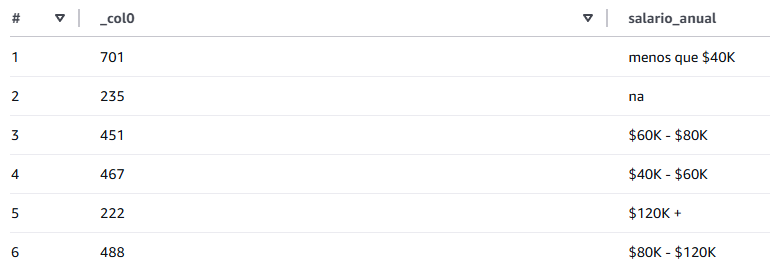

**Resposta:** A maioria dos clientes da base tem uma faixa salarial abaixo de 40K. Existe também um número considerável de clientes que não informaram sua faixa salarial (dados nulos).

### **2.2. Quantidade de Clientes por Sexo**

Vamos verificar a distribuição entre homens e mulheres.

*SELECT count(*), sexo FROM credito GROUP BY sexo;*


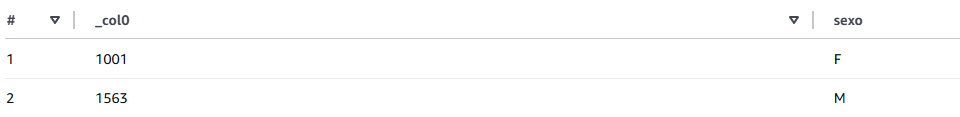

**Resposta:** A maioria dos clientes são homens.



### **2.3. Idade Média dos Clientes**

Queremos saber a idade média dos clientes, além da idade mínima e máxima.

*SELECT avg(idade) as media_idade, min(idade) as min_idade, max(idade) as max_idade, sexo FROM credito GROUP BY sexo;*


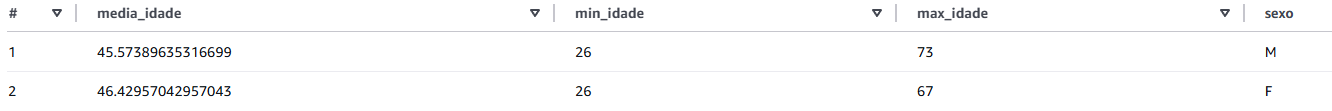

**Resposta:** A média de idade entre homens e mulheres é muito semelhante. A menor idade registrada é a mesma para ambos os sexos, e a diferença na idade máxima é pequena.

### **2.4. Maior e Menor Transação Realizada**

Vamos investigar o valor das transações realizadas nos últimos 12 meses.

*SELECT min(valor_transacoes_12m) as transacao_minima, max(valor_transacoes_12m) as transacao_maxima FROM credito;*


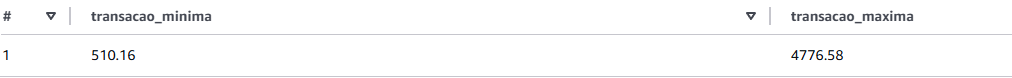

**Resposta:** As transações variam de 510.16 a 5776.58.



### **2.5. Características dos Clientes com Maiores Limites de Crédito**

Queremos identificar quais características estão associadas aos clientes que possuem os maiores limites de crédito.


*SELECT max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo
FROM credito
WHERE escolaridade != 'na' AND tipo_cartao != 'na'
GROUP BY escolaridade, tipo_cartao, sexo
ORDER BY limite_credito DESC
LIMIT 10;*


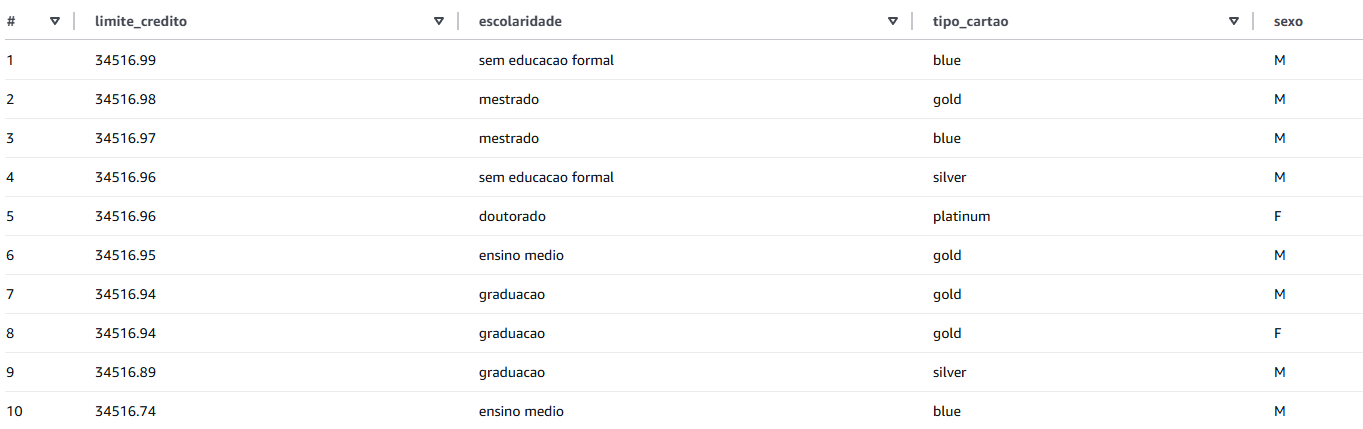

**Resposta:** Não parece haver um impacto claro da escolaridade no limite de crédito, mas a maioria dos clientes com os maiores limites são homens.

### **2.6. Características dos Clientes com Menores Limites de Crédito**

Agora vamos verificar as características dos clientes com os menores limites de crédito.

*SELECT max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo
FROM credito
WHERE escolaridade != 'na' AND tipo_cartao != 'na'
GROUP BY escolaridade, tipo_cartao, sexo
ORDER BY limite_credito ASC;*


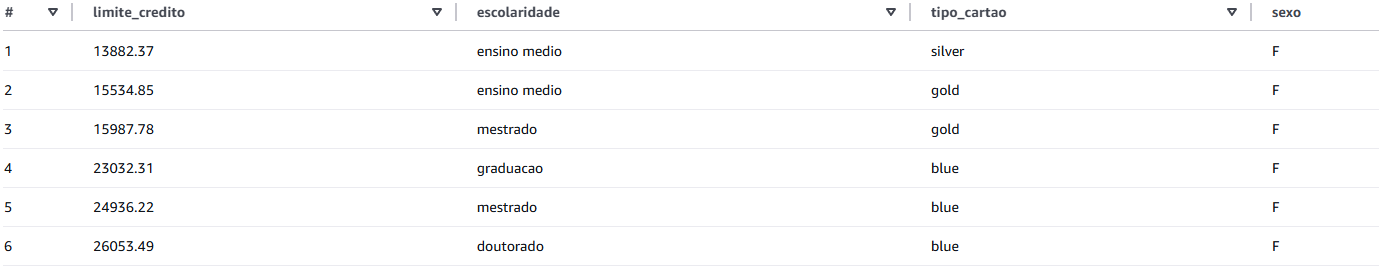

**Resposta:** Nos menores limites, mulheres predominam, e não há presença de cartões Platinum.



### **2.7. Comparação de Gastos Entre Homens e Mulheres**

Vamos ver se as mulheres gastam mais do que os homens.

*SELECT max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo
FROM credito
GROUP BY sexo;*


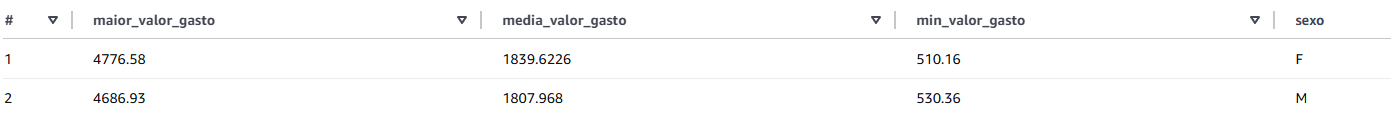

**Resposta:** Apesar das diferenças nos limites de crédito, os gastos médios entre homens e mulheres são muito semelhantes.



### **2.8. Impacto do Salário no Limite de Crédito**

Queremos saber se a faixa salarial impacta o limite de crédito.

*SELECT avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual
FROM credito
WHERE salario_anual != 'na'
GROUP BY sexo, salario_anual
ORDER BY avg(valor_transacoes_12m) DESC;*


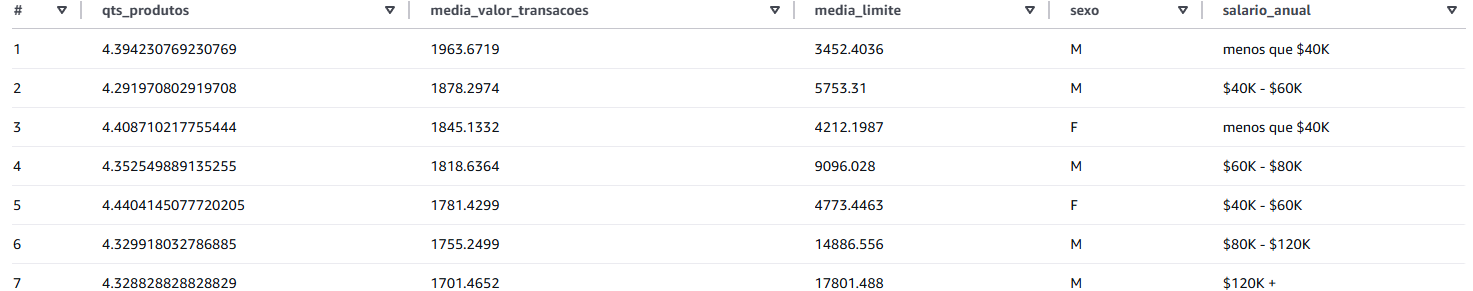

**Resposta:** Sim, pessoas com salários mais baixos têm limites de crédito menores.



## 3\. Conclusão


Alguns insights interessantes:


* A maior parte dos clientes possui renda até 40K.
* A maioria dos clientes é masculina.
* A escolaridade não parece influenciar no limite de crédito nem no tipo de cartão.
* Homens tendem a ter maiores limites de crédito.
* Mulheres predominam entre os clientes com menores limites de crédito.
* Não há clientes do sexo feminino com salário acima de 60K.
* O salário tem um impacto direto no limite de crédito.


Esses insights podem ser úteis para direcionar estratégias de marketing e concessão de crédito. A exploração mais profunda dos dados pode revelar ainda mais padrões e influências, especialmente sobre a diferença de crédito entre homens e mulheres, o que pode indicar questões culturais ou práticas que merecem ser repensadas.